In [1]:
import pandas as pd
import string
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords  
from nltk.tokenize import TweetTokenizer
import nltk

In [2]:
sources = [
    'AOC',
    'BernieSanders',
    'JoeBiden',
    'bgreene',
    'michiokaku',
    'neiltyson'
]
stop_words = set(stopwords.words('english'))

In [6]:
def preprocess_wordcloud(doc):
    doc = re.sub(r"http\S+", '', doc.lower())
    doc = re.sub(r'[^\w\s]','',doc)
    doc = doc.replace('rt', ' ')
    doc = doc.replace('amp', ' ')
    doc = doc.replace('one', ' ')
    doc = doc.replace('ans', ' ')
    # remove stopwords
    tokens = tokenize(doc)
    tokens = [token for token in tokens if not token in stop_words and len(token) > 2]
    doc = ' '.join(tokens)
    return doc

def tokenize(doc):
    tt = TweetTokenizer()
    tokens = tt.tokenize(doc)
    return tokens

def tweets_lengths(sources):
    tweets = []
    for source in sources:
        df = pd.read_csv('../data/' + source + '.csv', sep='\t')
        tweets.extend(df['full_text'].values)
    
    # remove punctuation and count words
    tweets_lengths = [len((tweet.translate(str.maketrans('', '', string.punctuation))).split()) for tweet in tweets]
    return np.array(tweets_lengths)

def wordclouds(sources):
    tweets_tokens = []
    for source in sources:
        df = pd.read_csv('../data/' + source + '.csv', sep='\t')
        df['full_text'] = df['full_text'].map(preprocess_wordcloud)
        for text in df['full_text'].values:
            tweets_tokens.extend(text.split())

    wordcloud = WordCloud(width=1200, height=800, background_color='white', colormap='coolwarm')
    wordcloud.generate(' '.join(tweets_tokens))
    plt.figure(figsize = (10, 8)) 
    plt.axis('off')
    plt.imshow(wordcloud)

In [7]:
lengths = tweets_lengths(sources)

In [8]:
print('Average words per tweet:', round(np.mean(lengths), 0))
print('Number of words in longest tweet:', round(np.max(lengths), 0))
print('Number of words in shortest tweet:', round(np.min(lengths[lengths > 0]), 0))

Average words per tweet: 28.0
Number of words in longest tweet: 75
Number of words in shortest tweet: 1


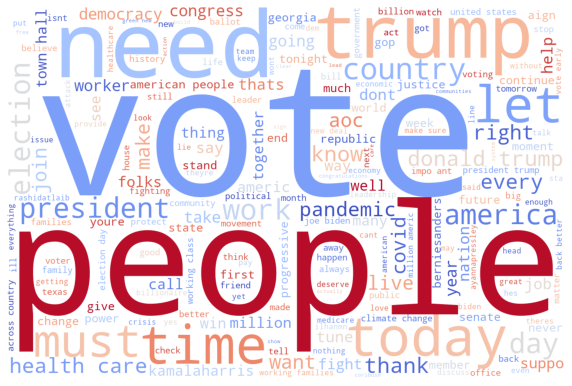

In [9]:
wordclouds(sources[0:3])

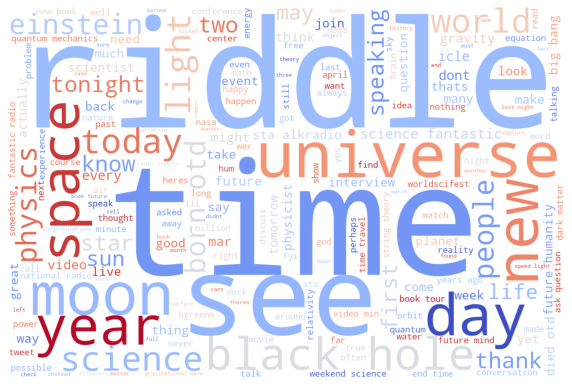

In [10]:
wordclouds(sources[3:6])